**Flipkart Sales Data Analysis Project**

**1. Project Title**

An Exploratory Data Analysis of Flipkart Sales Dataset to Understand Customer Behavior, Product Performance and Delivery Efficiency.



---


**2. Project Objective**

The main objective of this project is to analyze the Flipkart sales dataset **to gain meaningful insights into customer demographics, product categories, pricing structure, delivery patterns and order outcomes.** The study aims to identify factors influencing sales performance, customer satisfaction, order cancellations and overall business efficiency, which can support data-driven decision-making.

---

**3. Dataset Description**

The dataset contains transactional sales data with customer, product, pricing and delivery-related attributes. The key columns include:

- **Order Details:** OrderDate, OrderID, Delivery Date, Status, Reason, Rating

- **Customer Information:** CustomerID, Customer Age, Customer Gender, Location, Zone

- **Product Information:** Product Category, SubCategory, Product

- **Pricing Information:** Unit Price, Shipping Fee, Order Quantity, Sale Price

- **Delivery Information:** Delivery Type

This dataset allows both behavioral and operational analysis.

#### **Importing Important Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **4. Data Loading**

The dataset is loaded from a structured file format (such as CSV or Excel) into the analytical environment. During loading, column names and data types are reviewed to ensure consistency and completeness. Date fields and numerical values are verified for proper interpretation.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Flipkart Sales Dataset.csv')
df.head()

,OrderDate,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,Product Category,SubCategory,Product,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating
0,05/31/2020,5136486,06-04-2020,230569424,57,M,Western,Zone 3,Express,Fashion,Girl's fashion,Fashion Girl's Dress Kids Children Newborn Bab...,147,10,2,196,Returned,Onsite -Description mismatch,2
1,05/31/2020,5136457,06-12-2020,230568182,24,F,Western,Zone 3,Standard Delivery,Health and beauty,Medical supplies and Equipment,Blood Pressure Monitor Digital Wrist BP Pulse ...,131,4,7,183,Returned,Product - Not fitting expectation,2
2,05/31/2020,5136465,06-10-2020,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,Medical supplies and Equipment,Portable Blood Pressure Monitor - White,69,6,10,205,Delivered,NaN,3
3,05/31/2020,5136488,06-05-2020,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,Mobile phones,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,148,7,7,291,Delivered,NaN,1
4,05/31/2020,5136449,06-10-2020,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,126,12,9,260,Delivered,NaN,3


#### **5. Data Assessment and Pre-Processing**

**5.1 Structural Assessment**

- Checked the total number of records and columns.

- Verified column data types such as dates, numerical fields and categorical variables.

- Identified naming inconsistencies such as spaces in column names.

In [ ]:
df.shape

(133503, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133503 entries, 0 to 133502
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   OrderDate         133503 non-null  object
 1   OrderID           133503 non-null  int64 
 2   Delivery Date     133503 non-null  object
 3   CustomerID        133503 non-null  int64 
 4   Customer Age      133503 non-null  int64 
 5   Customer Gender   133503 non-null  object
 6   Location          133503 non-null  object
 7   Zone              133503 non-null  object
 8   Delivery Type     133503 non-null  object
 9   Product Category  133503 non-null  object
 10  SubCategory       133503 non-null  object
 11  Product           133503 non-null  object
 12  Unit Price        133503 non-null  int64 
 13  Shipping Fee      133503 non-null  int64 
 14  Order Quantity    133503 non-null  int64 
 15  Sale Price        133503 non-null  int64 
 16  Status            133503 non-null  obj

In [ ]:
df.columns

Index(['OrderDate', 'OrderID', 'Delivery Date', 'CustomerID', 'Customer Age',
       'Customer Gender', 'Location', 'Zone', 'Delivery Type',
       'Product Category', 'SubCategory', 'Product', 'Unit Price',
       'Shipping Fee', 'Order Quantity', 'Sale Price', 'Status', 'Reason',
       'Rating'],
      dtype='object')

In [ ]:
df.columns = (
    df.columns
      .str.strip()                # removing leading/trailing spaces
      .str.lower()                # lowercase
      .str.replace(' ', '_')      # replacing spaces with underscores
)

In [ ]:
df.columns

Index(['orderdate', 'orderid', 'delivery_date', 'customerid', 'customer_age',
       'customer_gender', 'location', 'zone', 'delivery_type',
       'product_category', 'subcategory', 'product', 'unit_price',
       'shipping_fee', 'order_quantity', 'sale_price', 'status', 'reason',
       'rating'],
      dtype='object')

**5.2 Data Quality Assessment**

- Examined missing values in key fields like Rating, Reason and Delivery Date.

- Checked for duplicate OrderIDs.

- Verified logical consistency (e.g., Sale Price should not be less than zero).

In [ ]:
df.isnull().sum()

,0
orderdate,0
orderid,0
delivery_date,0
customerid,0
customer_age,0
customer_gender,0
location,0
zone,0
delivery_type,0
product_category,0


**Problem :** There are 98522 missing values in the reason column.

**Solution :** Filling the missing values with "No Reason Specified".

In [ ]:
df['reason'] = df['reason'].fillna("No Reason Specified")
df['reason'].value_counts()

,count
reason,
No Reason Specified,98522
Delivey - Missing item/part,7125
Quality-Defective item,7114
Delivery-Wrong item,6955
Onsite -Description mismatch,6895
Product - Not fitting expectation,6892


In [ ]:
df.duplicated().sum()

np.int64(20502)

In [ ]:
# inspecting the duplicate rows
duplicates = df[df.duplicated(keep=False)]
duplicates.head()

,orderdate,orderid,delivery_date,customerid,customer_age,customer_gender,location,zone,delivery_type,product_category,subcategory,product,unit_price,shipping_fee,order_quantity,sale_price,status,reason,rating
0,05/31/2020,5136486,06-04-2020,230569424,57,M,Western,Zone 3,Express,Fashion,Girl's fashion,Fashion Girl's Dress Kids Children Newborn Bab...,147,10,2,196,Returned,Onsite -Description mismatch,2
1,05/31/2020,5136457,06-12-2020,230568182,24,F,Western,Zone 3,Standard Delivery,Health and beauty,Medical supplies and Equipment,Blood Pressure Monitor Digital Wrist BP Pulse ...,131,4,7,183,Returned,Product - Not fitting expectation,2
2,05/31/2020,5136465,06-10-2020,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,Medical supplies and Equipment,Portable Blood Pressure Monitor - White,69,6,10,205,Delivered,No Reason Specified,3
3,05/31/2020,5136488,06-05-2020,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,Mobile phones,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,148,7,7,291,Delivered,No Reason Specified,1
4,05/31/2020,5136449,06-10-2020,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,126,12,9,260,Delivered,No Reason Specified,3


**Problem :** There are 20502 rows which are duplicated.

**Solution :** Duplicate **orderid** and **customerid** values are allowed as each row represents a unique product line item within an order.

In [ ]:
df[df['sale_price'] == 0]

,orderdate,orderid,delivery_date,customerid,customer_age,customer_gender,location,zone,delivery_type,product_category,subcategory,product,unit_price,shipping_fee,order_quantity,sale_price,status,reason,rating


#### **6. Data Cleaning**

**6.1 Handling Missing Values**

- Missing **reasons** were treated as **“No Reason Specified”**.

**6.2 Data Standardization**

- Customer Gender values were standardized (e.g., Male, Female).

- Product Category and SubCategory values were checked for spelling variations.

- Date formats were standardized for OrderDate and Delivery Date.

In [ ]:
df['customer_gender'] = df['customer_gender'].astype('category')
df['customer_gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 133503 entries, 0 to 133502
Series name: customer_gender
Non-Null Count   Dtype   
--------------   -----   
133503 non-null  category
dtypes: category(1)
memory usage: 130.6 KB


In [ ]:
print(df['product_category'].value_counts())

product_category
Health and beauty    42447
Fashion              39432
Phones and Tablet    21244
Home and Office      18193
Electronics          12187
Name: count, dtype: int64


In [ ]:
print(df['subcategory'].value_counts())

subcategory
Vitamins & Dietary Supplements    15089
Medical supplies and Equipment    12145
Men's fashion                     12117
Beauty and personal care           9140
Mobile phones                      9130
Boy's fashion                      9125
Women's fashion                    9109
Kitchen and dinning                9101
Girl's fashion                     9081
Home Audio                         6103
Digital Cameras                    6084
Fragrances                         6073
Home and Furniture                 6073
Mobile accessories                 6072
Tablets                            6042
Tools and Home Improvement         3019
Name: count, dtype: int64


In [ ]:
df[['orderdate','delivery_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133503 entries, 0 to 133502
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   orderdate      133503 non-null  object
 1   delivery_date  133503 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


**Problem :** The data type of orderdate and delivery_date are object.

**Solution :** Order and delivery dates were converted to datetime using mixed-format parsing to handle multiple date representations present in the dataset.

In [ ]:
df['orderdate'] = pd.to_datetime(
    df['orderdate'],
    format='mixed',
    dayfirst=False,
    errors='coerce'
)

df['delivery_date'] = pd.to_datetime(
    df['delivery_date'],
    format='mixed',
    dayfirst=False,
    errors='coerce'
)

df[['orderdate','delivery_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133503 entries, 0 to 133502
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   orderdate      133503 non-null  datetime64[ns]
 1   delivery_date  133503 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.0 MB


**6.3 Outlier Detection**

- Extremely high or low unit prices and shipping fees were examined.

In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [ ]:
price_low, price_high = detect_outliers(df['unit_price'])
ship_low, ship_high = detect_outliers(df['shipping_fee'])
sale_low, sale_high = detect_outliers(df['sale_price'])

In [ ]:
extreme_prices = df[
    (df['unit_price'] < price_low) |
    (df['unit_price'] > price_high)
]

extreme_shipping = df[
    (df['shipping_fee'] < ship_low) |
    (df['shipping_fee'] > ship_high)
]

extreme_sale = df[
    (df['sale_price'] < sale_low) |
    (df['sale_price'] > sale_high)
]

In [ ]:
df[df['unit_price'] <= 0]
df[df['shipping_fee'] < 0]
df[df['sale_price'] <= 0]

,orderdate,orderid,delivery_date,customerid,customer_age,customer_gender,location,zone,delivery_type,product_category,subcategory,product,unit_price,shipping_fee,order_quantity,sale_price,status,reason,rating


**Note :** Zero or negative prices usually = data errors.

#### **7. Exploratory Data Analysis (EDA)**

***7.1 Univariate Analysis***

**7.1.1 Distribution of Product Categories**

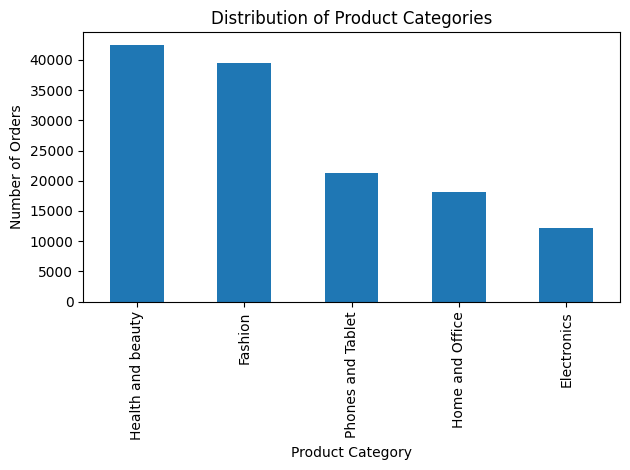

In [ ]:
plt.figure()
df["product_category"].value_counts().plot(kind="bar")
plt.title("Distribution of Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

**Insight:**


---


The chart shows that **Health and Beauty and Fashion** dominate the number of orders, indicating strong and consistent consumer demand in lifestyle-oriented categories. **Electronics** has comparatively fewer orders, suggesting that such products are purchased less frequently **but may contribute higher value per transaction.**

**7.1.2 Customer Age Distribution**

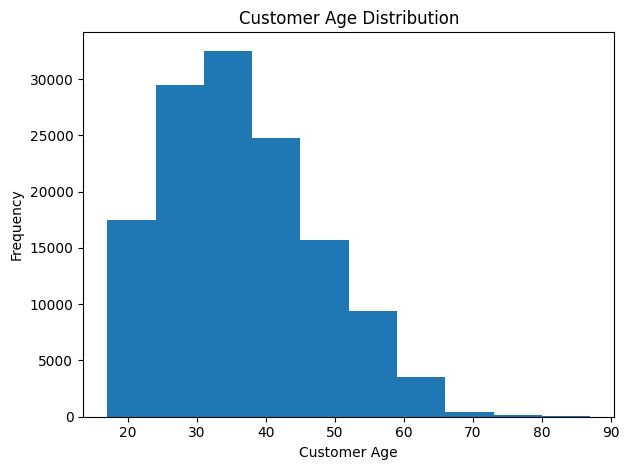

In [ ]:
plt.figure()
df["customer_age"].dropna().plot(kind="hist", bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Insight:**



---


Most customers fall between the age group of **25 to 45 years**, indicating that Flipkart’s primary user base **consists of working professionals and digitally active consumers.** Very few orders are placed by senior citizens, reflecting lower adoption or purchasing frequency among older age groups.

**7.1.3 Order Status Distribution**

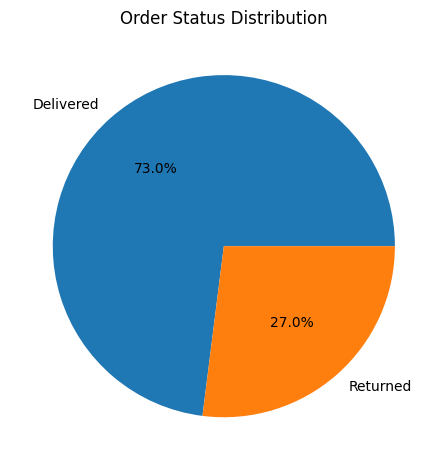

In [ ]:
plt.figure()
df["status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Order Status Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

**Insight:**

---

**A large majority of orders are successfully delivered**, while a smaller portion is returned. **This reflects efficient order fulfillment and logistics management**, though the presence of returns highlights the **need for quality checks and accurate product descriptions.**

**7.1.4 Customer Rating Distribution**

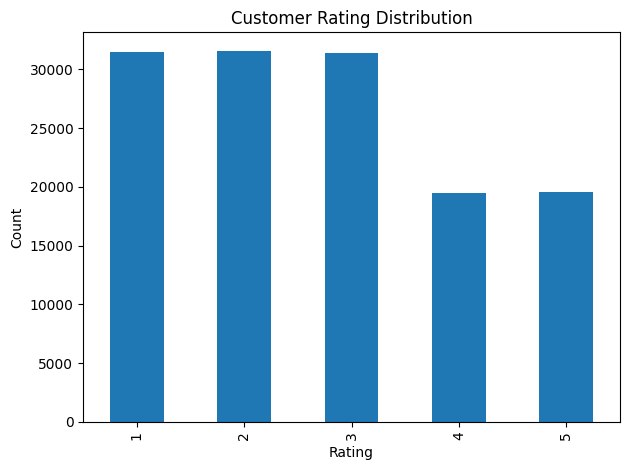

In [ ]:
plt.figure()
df["rating"].dropna().value_counts().sort_index().plot(kind="bar")
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Insight:**


---

**Ratings are fairly spread across all levels**, but higher ratings occur frequently, suggesting overall customer satisfaction. However, a noticeable count of low ratings indicates dissatisfaction in certain orders, **possibly due to delivery delays, product mismatch or service-related issues.**

***7.2 Bivariate Analysis***

**7.2.1 Product Category vs Sale Price (Box Plot)**

<Figure size 640x480 with 0 Axes>

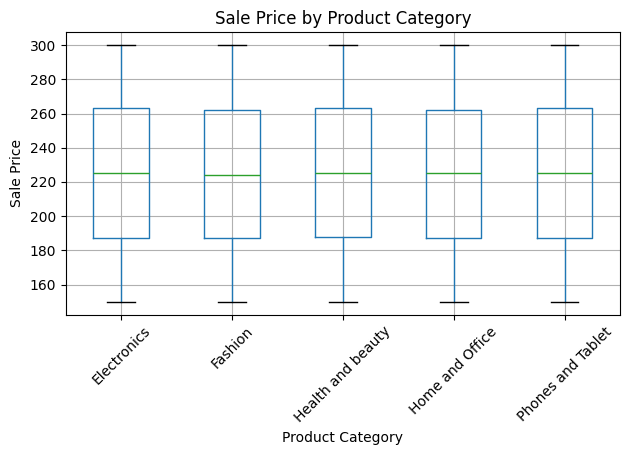

In [ ]:
plt.figure()
df.boxplot(column="sale_price", by="product_category", rot=45)
plt.title("Sale Price by Product Category")
plt.suptitle("")
plt.xlabel("Product Category")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

**Insight:**


---

The box plot **indicates that sale prices remain fairly consistent across product categories**, with some categories showing slightly higher variability. This suggests standardized pricing strategies across categories with limited extreme price variations.

**7.2.2 Customer Age vs Order Quantity (Scatter Plot)**

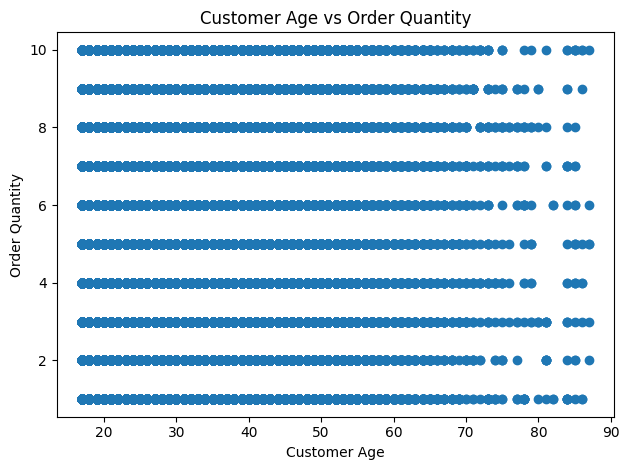

In [ ]:
plt.figure()
plt.scatter(df["customer_age"], df["order_quantity"])
plt.title("Customer Age vs Order Quantity")
plt.xlabel("Customer Age")
plt.ylabel("Order Quantity")
plt.tight_layout()
plt.show()

**Insight:**


---

The scatter plot **shows no strong linear relationship between age and order quantity.** However, **middle-aged customers appear to place moderately higher quantity orders**, while younger and older customers generally place smaller orders.

**7.2.3 Delivery Type vs Order Status (Stacked Bar Chart)**

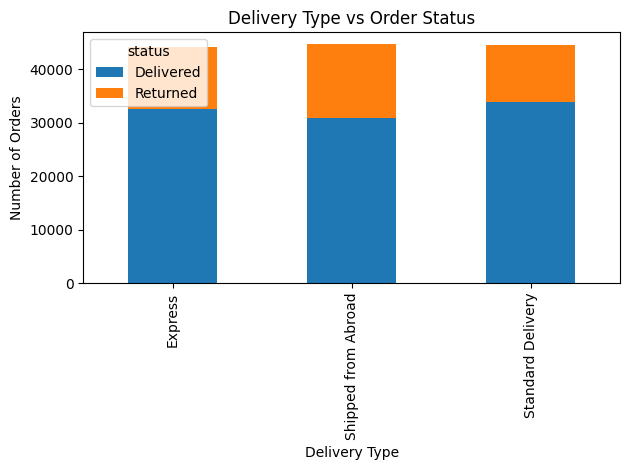

In [ ]:
delivery_status = pd.crosstab(df["delivery_type"], df["status"])

delivery_status.plot(kind="bar", stacked=True)
plt.title("Delivery Type vs Order Status")
plt.xlabel("Delivery Type")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

**Insight:**


---

**Express delivery has the highest proportion of successfully delivered orders**, while shipped-from-abroad orders show a relatively higher return rate. This highlights the importance of faster and reliable delivery methods in improving customer satisfaction.

**7.2.4 Zone vs Shipping Fee (Box Plot)**

<Figure size 640x480 with 0 Axes>

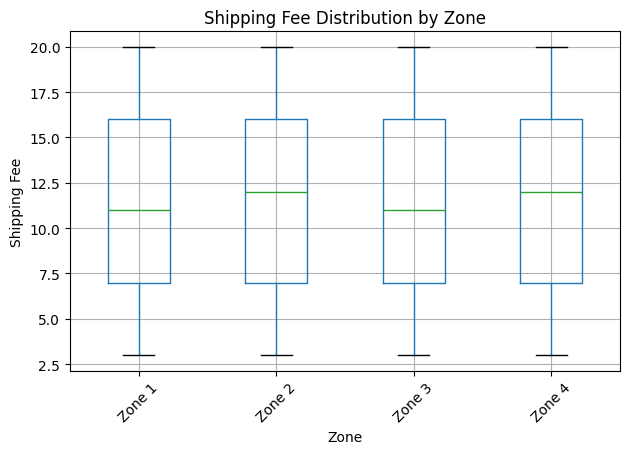

In [ ]:
plt.figure()
df.boxplot(column="shipping_fee", by="zone", rot=45)
plt.title("Shipping Fee Distribution by Zone")
plt.suptitle("")
plt.xlabel("Zone")
plt.ylabel("Shipping Fee")
plt.tight_layout()
plt.show()

**Insight:**


---

Shipping fees vary slightly across zones, with some zones showing higher median costs. This **reflects geographical differences in logistics expenses and indicates potential areas for cost optimization or zone-based pricing strategies.**

***7.3 Multivariate Analysis***

**7.3.1 Product Category × Rating × Order Status**

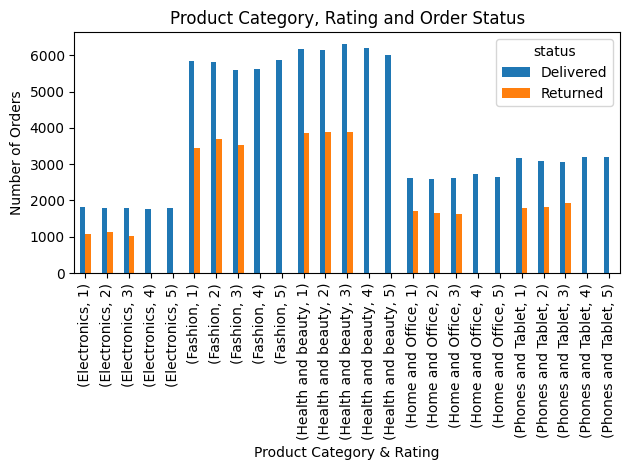

In [ ]:
multi_1 = pd.crosstab(
    [df["product_category"], df["rating"]],
    df["status"]
)

multi_1.plot(kind="bar")
plt.title("Product Category, Rating and Order Status")
plt.xlabel("Product Category & Rating")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

**Insight:**


---

Products with higher ratings across all categories tend to have significantly more delivered orders and fewer returns. This **confirms a strong relationship between customer satisfaction and order success, emphasizing the importance of product quality and accurate listings.**

**7.3.2 Zone × Delivery Type × Sale Price**

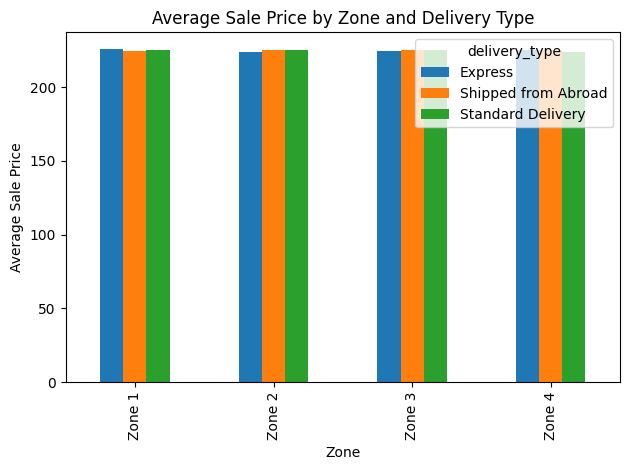

In [ ]:
multi_2 = df.groupby(
    ["zone", "delivery_type"]
)["sale_price"].mean().unstack()

multi_2.plot(kind="bar")
plt.title("Average Sale Price by Zone and Delivery Type")
plt.xlabel("Zone")
plt.ylabel("Average Sale Price")
plt.tight_layout()
plt.show()

**Insight:**


---


Average sale prices remain relatively stable across zones and delivery types, suggesting that customers across regions are willing to pay similar prices regardless of delivery method. This **indicates consistent pricing policies across the platform.**

**7.3.3 Customer Gender × Product Category × Sale Price**

/tmp/ipython-input-2311594544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_3 = df.groupby(


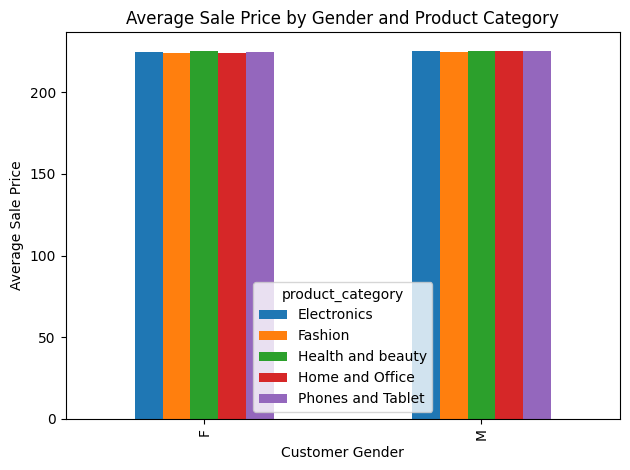

In [ ]:
multi_3 = df.groupby(
    ["customer_gender", "product_category"]
)["sale_price"].mean().unstack()

multi_3.plot(kind="bar")
plt.title("Average Sale Price by Gender and Product Category")
plt.xlabel("Customer Gender")
plt.ylabel("Average Sale Price")
plt.tight_layout()
plt.show()

**Insight:**


---

Spending patterns between male and female customers are largely similar across product categories. This **suggests that purchasing power and price sensitivity do not vary significantly by gender**, allowing Flipkart to adopt inclusive marketing strategies rather than gender-specific pricing.